# Insurance Cost Prediction Analysis

This project aims to explore and analyze factors that influence insurance costs using the `insurance.csv` dataset. We will investigate how different variables, such as age, BMI, smoking status, and more, affect the cost of insurance. Finally, we will build a predictive model to estimate insurance costs based on these features.


## Data Overview

The dataset includes the following variables:
- `age`: Age of the insured person.
- `sex`: Gender of the insured person.
- `bmi`: Body mass index, a measure of body fat based on height and weight.
- `children`: Number of children covered by the insurance policy.
- `smoker`: Smoking status of the insured person.
- `region`: The insured person's residential area in the U.S.
- `charges`: The medical insurance cost.


## Step 1: Load and Explore the Dataset

In this step, we load the dataset and perform a preliminary exploration. We will:
- Load the `insurance.csv` file using `pandas`.
- Display the first few rows of the dataset to get an initial look at the data.
- Check the structure of the dataset, including data types and missing values, with `info()`.
- Calculate basic statistical measures for the numerical columns using `describe()`.


In [35]:
import pandas as pd

# Load data
data = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
print(data.head())

# Check the structure and data types
print(data.info())

# Display basic statistics for numerical columns
print(data.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

## Exploratory Data Analysis

### Impact of Smoking on Insurance Cost

We start by analyzing the impact of smoking on insurance costs. This is expected to be a significant factor due to the increased health risks associated with smoking.

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


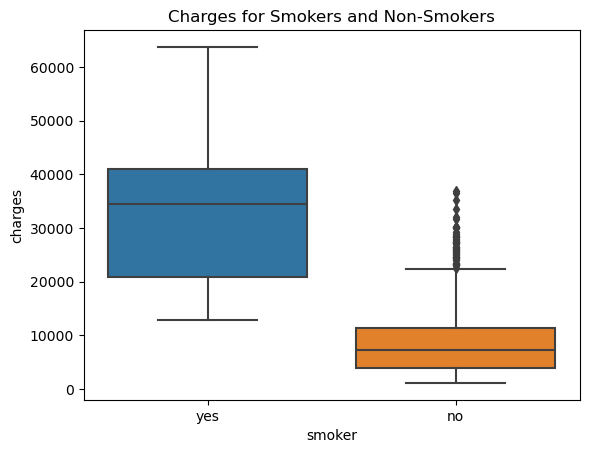

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average charges for smokers and non-smokers
smoker_charges = data.groupby('smoker')['charges'].mean()
print(smoker_charges)

# Boxplot of charges by smoking status
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Charges for Smokers and Non-Smokers")
plt.show()


## Impact of BMI on Insurance Charges

In this section, we analyze the effect of Body Mass Index (BMI) on insurance charges. BMI is a measure of body fat based on height and weight, and it is often used as an indicator of overall health. Higher BMI values are commonly associated with increased health risks, which can lead to higher insurance costs. 

We will use a scatter plot to visualize the relationship between BMI and insurance charges, with data points color-coded by smoking status to observe any further differences in charges for smokers and non-smokers.


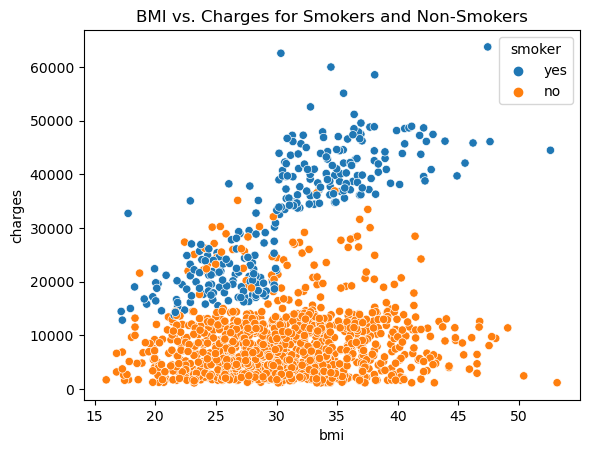

In [37]:
# Scatter plot of BMI vs. charges, color-coded by smoking status
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title("BMI vs. Charges for Smokers and Non-Smokers")
plt.show()


## Comparison of Insurance Charges for Males and Females

This section explores how gender influences insurance charges. We will use a boxplot to compare the average charges for males and females to see if there is a significant difference in insurance costs based on gender.


sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


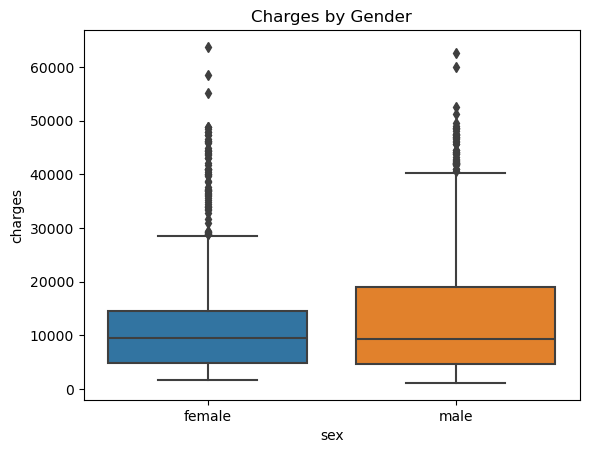

In [38]:
# Average charges by gender
sex_charges = data.groupby('sex')['charges'].mean()
print(sex_charges)

# Boxplot of charges by gender
sns.boxplot(x='sex', y='charges', data=data)
plt.title("Charges by Gender")
plt.show()


## Insurance Charges by Region

Regional differences in healthcare costs may affect insurance charges. In this section, we analyze how insurance charges vary across different regions in the dataset. We will use a boxplot to visualize the average charges for each region.


region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


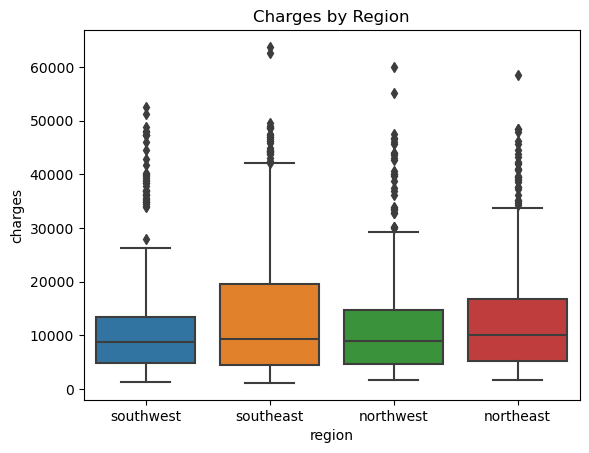

In [39]:
# Average charges by region
region_charges = data.groupby('region')['charges'].mean()
print(region_charges)

# Boxplot of charges by region
sns.boxplot(x='region', y='charges', data=data)
plt.title("Charges by Region")
plt.show()


## Average Insurance Charges by Number of Children

This section explores how the number of children covered by the insurance policy affects insurance charges. Larger families may have different health needs and costs, which could influence insurance premiums. By examining the average insurance charges across different family sizes, we can gain insights into whether the number of children impacts the cost of insurance.

A bar plot will be used to show the average charges for different numbers of children in the dataset.


children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


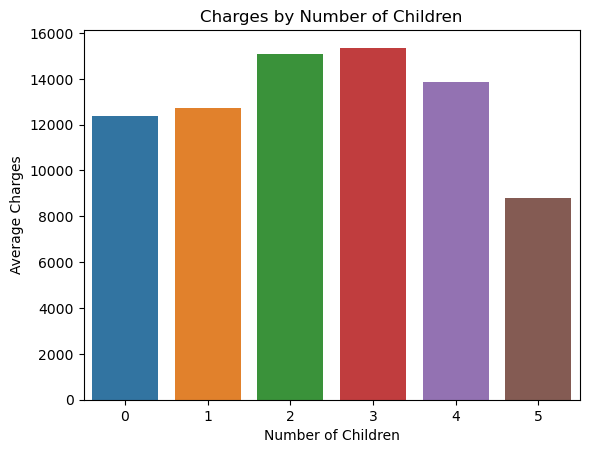

In [40]:
# Average charges by number of children
children_charges = data.groupby('children')['charges'].mean()
print(children_charges)

# Bar plot of charges by number of children
sns.barplot(x=children_charges.index, y=children_charges.values)
plt.title("Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Average Charges")
plt.show()


## Insurance Charges by BMI and Smoking Interaction Category

In this section, we examine how the combination of Body Mass Index (BMI) and smoking status affects insurance charges. Since both high BMI and smoking are associated with increased health risks, their combined impact on insurance costs is particularly important. 

To analyze this, we categorize individuals into different BMI × Smoker groups, ranging from "Very Low" to "Very High" interaction categories. We then use a boxplot to visualize the distribution of insurance charges across these categories, which allows us to observe the variation in costs for each group.


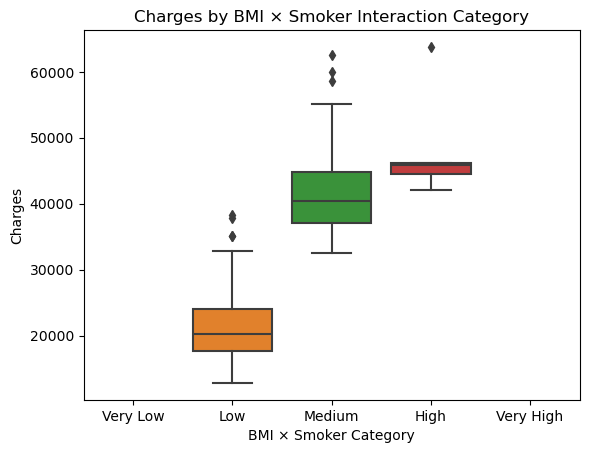

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for BMI and smoking interaction categories
data['bmi_smoker_category'] = pd.cut(data['bmi_smoker'], bins=[0, 15, 30, 45, 60, 100], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Boxplot by category
sns.boxplot(x='bmi_smoker_category', y='charges', data=data)
plt.title("Charges by BMI × Smoker Interaction Category")
plt.xlabel("BMI × Smoker Category")
plt.ylabel("Charges")
plt.show()





## Heatmap of Correlations Among Insurance Features

To better understand the relationships between different variables in the dataset, we analyze a correlation matrix that highlights how these features relate to one another. This analysis can help us identify which factors are most strongly associated with insurance charges, as well as how various features, such as age, BMI, and smoking status, are interrelated.

We visualize the correlation matrix using a heatmap, where warmer colors indicate stronger positive correlations and cooler colors represent negative correlations. This heatmap provides insights into which variables are likely to have the most significant impact on insurance costs.


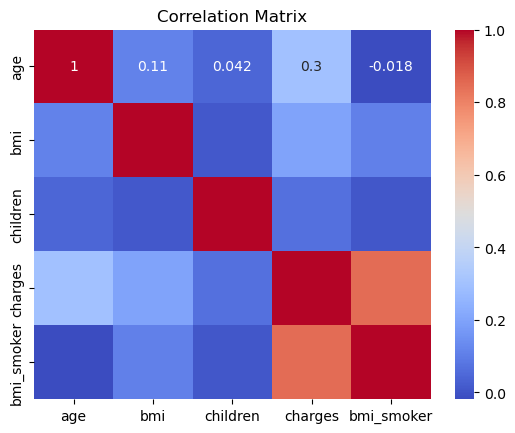

In [45]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Model Training and Evaluation

In this section, we trained multiple models to predict insurance costs based on the features in the dataset. The following models were tested:
- **Linear Regression**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

Each model was evaluated using **Mean Squared Error (MSE)** and **R² Score**. These metrics help us understand the model's accuracy and how well it fits the data.



In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression\nMSE:", mse_lr, "\nR^2:", r2_lr)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor\nMSE:", mse_rf, "\nR^2:", r2_rf)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor\nMSE:", mse_gb, "\nR^2:", r2_gb)


Linear Regression
MSE: 20960038.222223382 
R^2: 0.8649905991448694
Random Forest Regressor
MSE: 20256784.599061534 
R^2: 0.8695204501549507
Gradient Boosting Regressor
MSE: 18563492.680113375 
R^2: 0.8804274115367117


## Hyperparameter Tuning

To improve the performance of the Gradient Boosting Regressor, we conducted a hyperparameter tuning process using GridSearchCV. The following parameters were optimized:
- `n_estimators`: Number of boosting stages.
- `learning_rate`: Step size at each iteration.
- `max_depth`: Maximum depth of the individual regression estimators.

This optimization process helps us find the best configuration for the model, improving both accuracy and generalization.


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
print("Best Gradient Boosting Model\nMSE:", mse_best_gb, "\nR^2:", r2_best_gb)


Best Gradient Boosting Model
MSE: 18610900.365280855 
R^2: 0.8801220455300981


## Model Results
- **Linear Regression**: R² = 0.865, MSE = 20,960,038
- **Random Forest Regressor**: (0.869 R² and 20,256,784 MSE)
- **Gradient Boosting Regressor**: (0.88 R² and 18,610,900 MSE)

## Feature Importance Analysis

To understand which features contribute the most to the prediction of insurance costs, we examine the feature importances from the optimized Gradient Boosting model. Features with higher importance values have a stronger impact on the model's output.

The feature importances are displayed below, ranked from most to least influential:



In [52]:
feature_importances = best_gb_model.feature_importances_
feature_names = X.columns
sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)

for importance, name in sorted_importances:
    print(f"{name}: {importance:.4f}")


bmi_smoker: 0.8358
age: 0.1156
smoker_yes: 0.0254
bmi: 0.0140
children: 0.0078
region_southwest: 0.0011
region_southeast: 0.0002
region_northwest: 0.0000


## Conclusion and Key Insights

This analysis provided valuable insights into the factors that influence insurance costs. Key findings include:
- **Smoking Status** and **BMI** are highly predictive of insurance costs.
- **Age** and **BMI** also have a significant impact.
- The optimized Gradient Boosting Regressor achieved an R² Score of 0.88, which explains a large portion of the variance in insurance costs.

Overall, the model indicates that lifestyle factors such as smoking and body mass index have a substantial impact on medical insurance costs.

